In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np

In [2]:
#dataset can be found in https://www.kaggle.com/jsphyg/weather-dataset-rattle-package 
weather = pd.read_csv('weatherAUS.csv')

In [3]:
pd.set_option('max_columns', 100)

## Table of contents
1. [Introduction](#introduction)
2. [Hypothesis Testing](#paragraph1)
3. [Model Selection](#paragraph2)
    1. [Sub paragraph](#subparagraph1)
4. [Another paragraph](#paragraph2)

## Introduction <a name="introduction"></a>
Our goal is to be able to make prediction on whether it will rain on the next day. To do so, we will explore several models and work on the best one to compare their performance. 

In [4]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
#checking basic distributions of the fields  
weather.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,142193,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,138415,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787,142193.000000,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,2016-09-18,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,49,3418,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,10663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,NaN,110316
mean,NaN,NaN,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,NaN,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,NaN,2.360682,NaN
std,NaN,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,NaN,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,NaN,8.477969,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,0.000000,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,NaN,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,NaN,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000,NaN
75%,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,NaN,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,0.800000,NaN


In [6]:
#checking data type information
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
#transforming date into datetime variable
weather['Date'] = pd.to_datetime(weather['Date'])

In [8]:
#confirming datetime has been converted
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

### Drop RISK_MM variable
As noted in the dataset description, we need to drop the RISK_MM feature as it is the feature that is used to make binary category if "will it rain tomorrow". 

In [9]:
weather.drop(['RISK_MM'], axis = 1, inplace = True)

In [10]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Before starting our model predictions, we will split the train-cv-test data in 50/25/25 and then for our benchmark models, no substantive data analysis, feature selection or feature engineering will be applied. This split will prevent data leakage. 

Before splitting the data, we will make a few transformations to make our analysis easier later on.

In [11]:
#switching RainToday to Binary allows for analysis later on
weather['RainToday'] = weather['RainToday'].str.replace('Yes', "1")
weather['RainToday'] = weather['RainToday'].str.replace('No', "0")
weather['RainToday'] = weather['RainToday'].astype('float')

In [12]:
#switching RainTomorrow to Binary allows for analysis later on
weather['RainTomorrow'] = weather['RainTomorrow'].str.replace('Yes', "1")
weather['RainTomorrow'] = weather['RainTomorrow'].str.replace('No', "0")
weather['RainTomorrow'] = weather['RainTomorrow'].astype('float')

In [13]:
weather_target = weather['RainTomorrow']
weather_predictive = weather.drop(['RainTomorrow'], axis = 1)

In [47]:
from sklearn.model_selection import train_test_split

# We will first create a train/test split and then use K-fold cross-validation to tune the models 
# By separating test data. This will minimise the risk of data leakage
X_train, X_test, Y_train, Y_test = train_test_split(weather_predictive, weather_target, test_size=0.25) 

In [48]:
#columns without null values
notnull_columns=X_train.columns[X_train.notnull().any()]
notnull_columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [16]:
#finding out percentage of null values in a field
null_columns=X_train.columns[X_train.isnull().any()]
X_train[null_columns].isnull().sum()/len(X_train)*100

MinTemp           0.450096
MaxTemp           0.227861
Rainfall          0.964893
Evaporation      43.012265
Sunshine         47.772027
WindGustDir       6.534826
WindGustSpeed     6.489817
WindDir9am        7.094633
WindDir3pm        2.599302
WindSpeed9am      0.938168
WindSpeed3pm      1.803196
Humidity9am       1.281366
Humidity3pm       2.475526
Pressure9am       9.830370
Pressure3pm       9.781141
Cloud9am         37.883988
Cloud3pm         40.228705
Temp9am           0.655452
Temp3pm           1.860864
RainToday         0.964893
dtype: float64

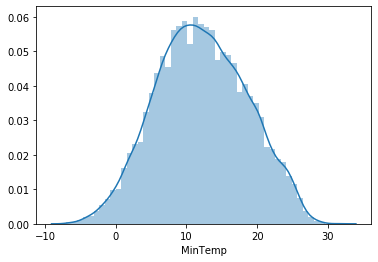

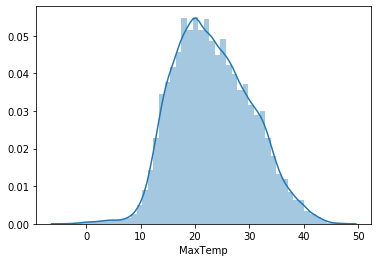

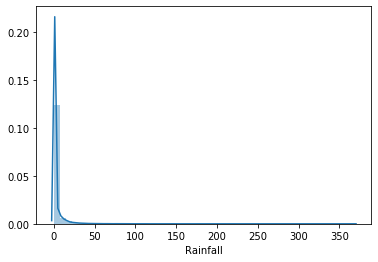

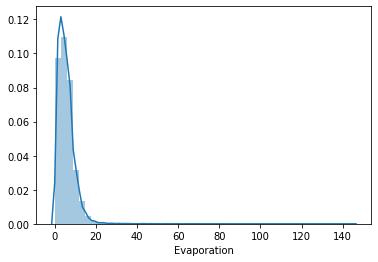

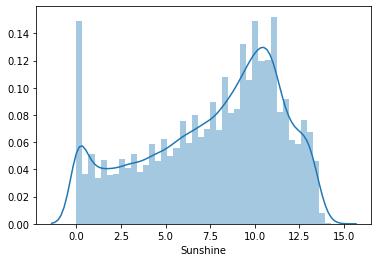

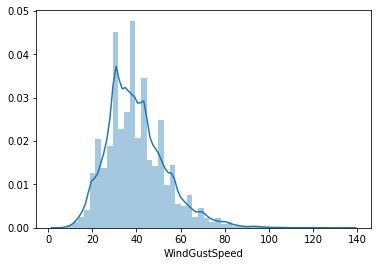

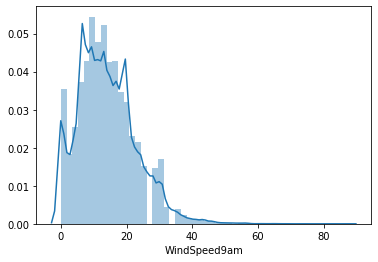

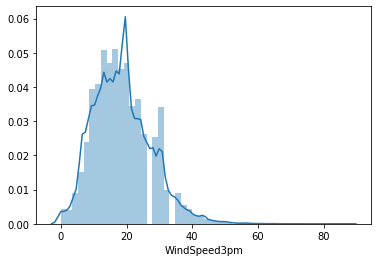

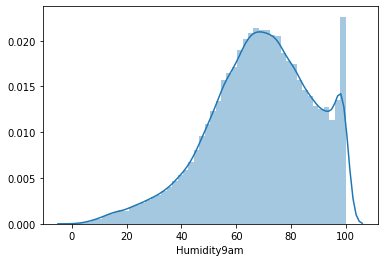

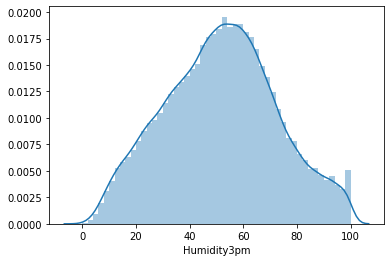

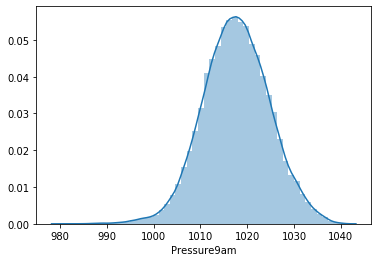

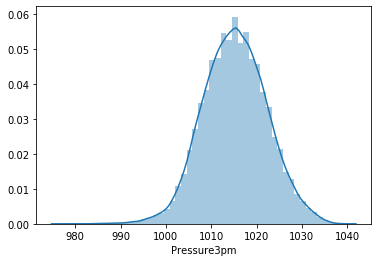

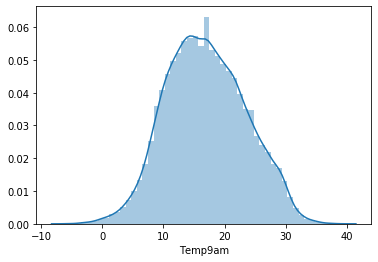

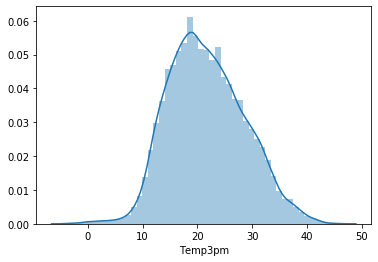

In [17]:
#checking distribution shape of numerical variables 
lst=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm']

for val in lst: 
    sns.distplot(X_train[val])
    plt.show()

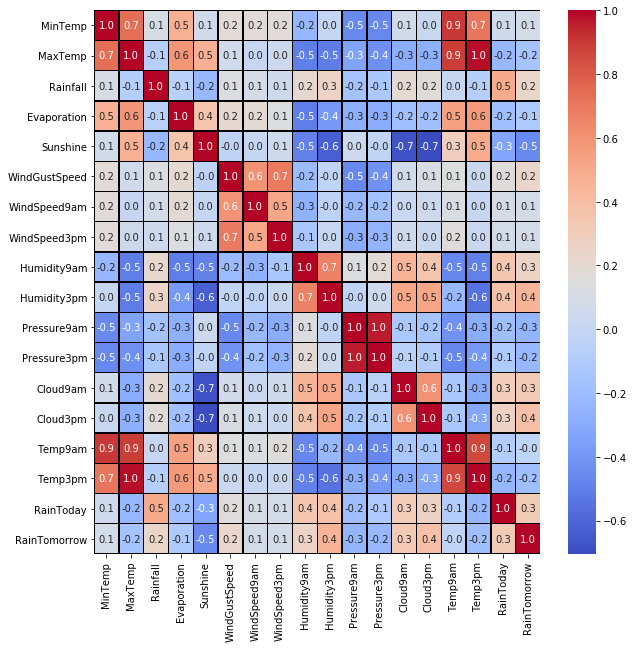

In [18]:
#presenting correlation of variables with high number of null values
lv, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.concat([X_train, Y_train], axis = 1).corr(), annot=True, linewidths=0.5, linecolor = 'black', fmt= '.1f',ax=ax, cmap="coolwarm")
plt.show()

## Date Variable

In [19]:
# Currently, it would be difficult for the model to pick up any pattern relating to date
# since every date is a different value. Therefore, it may be better if we take the year, month, and day
# component for training instead. 

for sets in [X_train, X_val, X_test]:
    sets['Year'] = sets['Date'].dt.year
    sets['Month'] = sets['Date'].dt.month
    sets['Day'] = sets['Date'].dt.day
    sets.drop('Date', axis = 1, inplace = True)

C:\Users\antho\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\antho\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\antho\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

I assume that the data are missing completely at random since there was no pattern shown in the way missing data appears. 

# Notable Variables 

### Location Variable

In [20]:
dummy = pd.get_dummies(X_train['Location'], sparse = False)
X_train = pd.concat([X_train, dummy], axis = 1)
X_train.drop('Location', axis = 1, inplace = True)

In [21]:
dummy = pd.get_dummies(X_val['Location'], sparse = False)
X_val = pd.concat([X_val, dummy], axis = 1)
X_val.drop('Location', axis = 1, inplace = True)

In [22]:
dummy = pd.get_dummies(X_test['Location'], sparse = False)
X_test = pd.concat([X_test, dummy], axis = 1)
X_test.drop('Location', axis = 1, inplace = True)

### MaxTemp / MinTemp Variables

In [23]:
# as shown before, MaxTemp and MinTemp have a generally normal distrbution.
# we will only impute the missing values for now. To prevent data leakage, we will fill
# the trainset mean to all the datasets

# median_MaxTemp = X_train['MaxTemp'].median()
# median_MinTemp = X_train['MinTemp'].median()

# for sets in [X_train, X_val, X_test]:
#     sets['MaxTemp'].fillna(median_MaxTemp, inplace = True)
#     sets['MinTemp'].fillna(median_MinTemp, inplace = True)

### Rainfall Variable

In [24]:
# as seen before, the rainfall variable is heavily skewed, 
# we will first find out the outliers using Tukey's Rule 

q1 = X_train['Rainfall'].quantile(0.25)
q3 = X_train['Rainfall'].quantile(0.75)
IQR = q3 - q1
IQR
lower = X_train['Rainfall'].median() - 1.5*IQR
upper = X_train['Rainfall'].median() + 1.5*IQR
print(lower); print(upper)

-1.2000000000000002
1.2000000000000002


In [25]:
# Since we can see that outside the range provided by Turkey's Rule, the upper-limit only 
# ends at 1.2 mm of rainfall. A lot of information would be lost if we simply discard 
# values beyond this point. Also, we know all values are >= 0. 
# Thus, we will log-transform the data first instead. 

# for sets in [X_train, X_val, X_test]:
#     sets["Rainfall"] = sets["Rainfall"].map(lambda i: np.log(i) if i > 0 else 0)

In [26]:
# as seen before, the rainfall variable is heavily skewed, 
# we will impute null values with median variable 

# median_Rainfall = X_train['Rainfall'].median()

# for sets in [X_train, X_val, X_test]:
#     sets['Rainfall'].fillna(median_Rainfall, inplace = True)

### Evaporation Variable

In [27]:
q1 = X_train['Evaporation'].quantile(0.25)
q3 = X_train['Evaporation'].quantile(0.75)
IQR = q3 - q1
IQR
lower = X_train['Evaporation'].median() - 1.5*IQR
upper = X_train['Evaporation'].median() + 1.5*IQR
print(lower); print(upper)

-2.4000000000000012
12.0


In [28]:
# We will apply the same treatment to evaporation as well for the same reasons. 

# for sets in [X_train, X_val, X_test]:
#     sets["Evaporation"] = sets["Evaporation"].map(lambda i: np.log(i) if i > 0 else 0)

In [29]:
# we will impute null values with median variable 
# median_Evaporation = X_train['Evaporation'].median()

# for sets in [X_train, X_val, X_test]:
#     sets['Evaporation'].fillna(median_Evaporation, inplace = True)

### Sunshine Variable 

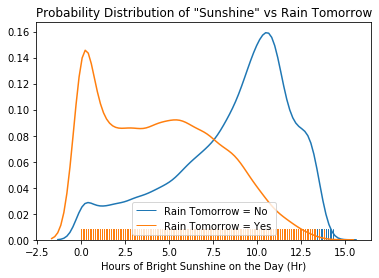

In [30]:
#Sunshine 
msk2 = Y_train == 0
msk3 = Y_train == 1
msk1 = X_train["Sunshine"].notnull()
target0 = X_train[msk1 & msk2]
target1 = X_train[msk1 & msk3]
sns.distplot(target0["Sunshine"], hist=False, rug=True)
sns.distplot(target1["Sunshine"], hist=False, rug=True)
plt.legend(labels=['Rain Tomorrow = No','Rain Tomorrow = Yes'])
plt.xlabel('Hours of Bright Sunshine on the Day (Hr)')
plt.title('Probability Distribution of "Sunshine" vs Rain Tomorrow')
plt.show()

In [31]:
# A somewhat bimodal distribution

In [32]:
# we will impute null values with median variable 
# median_Sunshine = X_train['Sunshine'].median()

# for sets in [X_train, X_val, X_test]:
#     sets['Sunshine'].fillna(median_Sunshine, inplace = True)

# Numerical Variables 

In [33]:
#Other variables exhibit normal distribution in general 
# for sets in [X_train, X_val, X_test]:
#     sets["WindGustSpeed"].fillna(X_train["WindGustSpeed"].median(), inplace = True)  
#     sets["WindSpeed9am"].fillna(X_train["WindSpeed9am"].median(), inplace = True)
#     sets["WindSpeed3pm"].fillna(X_train["WindSpeed3pm"].median(), inplace = True)
#     sets["Cloud3pm"].fillna(X_train["Cloud3pm"].median(), inplace = True)
#     sets["Cloud9am"].fillna(X_train["Cloud9am"].median(), inplace = True)
#     sets["Humidity9am"].fillna(X_train["Humidity9am"].median(), inplace = True)
#     sets["Humidity3pm"].fillna(X_train["Humidity3pm"].median(), inplace = True)    
#     sets["Pressure9am"].fillna(X_train["Pressure9am"].median(), inplace = True)   
#     sets["Pressure3pm"].fillna(X_train["Pressure3pm"].median(), inplace = True) 
#     sets["Temp9am"].fillna(X_train["Temp9am"].median(), inplace = True)
#     sets["Temp3pm"].fillna(X_train["Temp3pm"].median(), inplace = True)

# Categorical Variables 

In [34]:
null_columns=X_train.columns[X_train.isnull().any()]
X_train[null_columns].isnull().sum()/len(weather)*100

WindGustDir    3.267390
WindDir9am     3.547291
WindDir3pm     1.299642
RainToday      0.482443
dtype: float64

In [35]:
# We will utilise the benefit of having NA as a dummy variable on its own
# for cat in ['WindGustDir','WindDir9am','WindDir3pm']:   
#         dummy = pd.get_dummies(X_train[cat], sparse = False, prefix = cat, dummy_na = True)
#         X_train = pd.concat([X_train, dummy], axis = 1)
#         X_train.drop([cat], axis = 1, inplace = True)
        
# for cat in ['WindGustDir','WindDir9am','WindDir3pm']:   
#         dummy = pd.get_dummies(X_test[cat], sparse = False, prefix = cat, dummy_na = True)
#         X_test = pd.concat([X_test, dummy], axis = 1)
#         X_test.drop([cat], axis = 1, inplace = True)
        
# for cat in ['WindGustDir','WindDir9am','WindDir3pm']:   
#         dummy = pd.get_dummies(X_val[cat], sparse = False, prefix = cat, dummy_na = True)
#         X_val = pd.concat([X_val, dummy], axis = 1)
#         X_val.drop([cat], axis = 1, inplace = True)

In [36]:
null_columns=X_train.columns[X_train.isnull().any()]
X_train[null_columns].isnull().sum()/len(X_train)*100

RainToday    0.964893
dtype: float64

In [37]:
# Since RainToday is a binary variable with small enough null value, we will drop the value with NA
# for sets in [X_train, X_test, X_val]:
#     sets.dropna(inplace = True)

In [38]:
# null_columns=X_train.columns[X_train.isnull().any()]
# X_train[null_columns].isnull().sum()/len(X_train)*100

Series([], dtype: float64)

## Feature Scaling 

Since we will employ logistic regression and also neural network model, these non-tree based models can really benefit from scaling the data. 

In [39]:
# cols = X_train.columns

In [40]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(X_train)


# X_train = scaler.transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

In [41]:
# X_train = pd.DataFrame(X_train, columns=[cols])
# X_val = pd.DataFrame(X_val, columns=[cols])
# X_test = pd.DataFrame(X_test, columns=[cols])

In [42]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,...,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan
0,0.457584,0.416342,0.302684,0.285664,0.104895,0.200000,0.126437,0.149425,0.888889,0.75,0.725166,0.7232,0.777778,0.875,0.436404,0.383562,1.0,0.5,0.272727,0.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.526992,0.455253,0.302684,0.316319,0.587413,0.275000,0.126437,0.149425,0.989899,0.76,0.698675,0.7056,0.555556,0.625,0.471491,0.434442,1.0,0.9,0.909091,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.385604,0.620623,0.280475,0.537416,0.391608,0.383333,0.103448,0.275862,0.484848,0.20,0.483444,0.4592,0.111111,0.625,0.491228,0.606654,0.0,0.6,0.000000,0.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.323907,0.394942,0.280475,0.316319,0.587413,0.200000,0.103448,0.172414,0.686869,0.47,0.514901,0.5216,0.555556,0.750,0.396930,0.389432,0.0,0.5,0.818182,0.300000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.488432,0.519455,0.560951,0.562463,0.832168,0.183333,0.149425,0.218391,0.616162,0.56,0.768212,0.7568,0.222222,0.250,0.557018,0.516634,1.0,0.2,0.818182,0.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# PCA Analysis 

Given the number of variables we have, especially after the use of dummy variables. We now have a high dimensionality which can make it difficult for machine learning models to figure out patterns. Also, as shown in the correlation matrix above, there are some varaibles that are clearly correlated. For example, we can see there is a 0.9 and 1.0 correlation between MaxTemp and Temp9am/ Temp3pm respectively. We are likely to have benefit from using PCA analysis to minimise some of the variables in the set before our training. 

[5.34402623e-02 3.22184118e-02 2.71590467e-02 2.60003196e-02
 2.34403061e-02 2.20772446e-02 2.17798239e-02 2.04545540e-02
 1.94161460e-02 1.87286885e-02 1.84375695e-02 1.75822286e-02
 1.67675663e-02 1.59497480e-02 1.53109391e-02 1.48706672e-02
 1.44556427e-02 1.42592375e-02 1.41538921e-02 1.38917527e-02
 1.37591398e-02 1.36913671e-02 1.33305763e-02 1.32587250e-02
 1.29860902e-02 1.27767687e-02 1.26371588e-02 1.25913431e-02
 1.25011427e-02 1.21113258e-02 1.19948454e-02 1.19341866e-02
 1.18674207e-02 1.15643468e-02 1.15402224e-02 1.13657509e-02
 1.12544875e-02 1.10821258e-02 1.09854986e-02 1.07402793e-02
 1.03449094e-02 1.02379591e-02 9.97331408e-03 9.74276959e-03
 9.53158870e-03 9.14319877e-03 8.61131586e-03 8.34997508e-03
 7.78172152e-03 7.38744715e-03 6.65246500e-03 6.50249614e-03
 6.43254832e-03 6.31689893e-03 5.90803115e-03 5.07243497e-03
 4.99815652e-03 4.92418090e-03 4.89573206e-03 4.81999199e-03
 4.73595527e-03 4.68035639e-03 4.63751191e-03 4.61901198e-03
 4.60900582e-03 4.583219

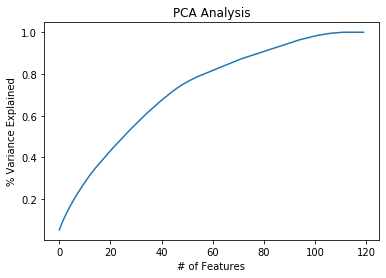

1.0

In [43]:
from sklearn.decomposition import PCA 
pca = PCA()
pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_val = pca.transform(X_val)
# X_test = pca.transform(X_test)
#Explained variance ratio
print(pca.explained_variance_ratio_)


var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))
print(var)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.plot(var)
plt.show()
#Cumulative variance
pca.explained_variance_ratio_.sum()

In [44]:
# pca = PCA(n_components=100)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_val = pca.transform(X_val)
# X_test = pca.transform(X_test)

## Model Testing

Since our problem is binary classification problem, logistic regression is an obvious candidate to be our proposed prediction model. 

We will apply basic data transformation process in order to apply the logistic regression model.

In [46]:
from sklearn.linear_model import LogisticRegression

# Now let's fit a model
logreg = LogisticRegression(max_iter = 10000)
_ = logreg.fit(X_train, Y_train)

# We can predict the type of new organisms given measurements
print('\nPredicted first five dates from validation split:', logreg.predict(X_val)[:5])
print('Actual raining status of first five days from validation split:', Y_val[:5])

ValueError: Found input variables with inconsistent numbers of samples: [70410, 71096]

## Evaluating benchmark logistic regression model


In [ ]:
from sklearn.metrics import classification_report, f1_score
key=', '.join(['{}={}'.format(i,name) for i,name in enumerate(['0','1'])])
print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))
print("Benchmark Logistic Model f1 score:", f1_score(Y_val, logreg.predict(X_val)))